In [93]:
import pandas as pd
import numpy as np

def process_file(file_path, currency, convert_to_euro=False):
    df = pd.read_csv(file_path)
    
    # Convert date columns to date time format
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Columns to be kept
    columns_to_keep = ['Close']

    # Converts numbers to floating point and removes commas
    for col in columns_to_keep:
        df[col] = df[col].replace(',', '', regex=True).astype(float)

        # Convert to Euro if required
        if convert_to_euro:
            df[col] = df[col] * 0.92

    # Handle missing values by forward filling
    df = df[columns_to_keep].fillna(method='ffill')
    
    df.columns = [f"{col}_{currency}" for col in columns_to_keep]

    return df

file_paths = {
    'ETH-EUR.csv': ('ETH', False),
    'BTC-EUR.csv': ('BTC', False),
    'DOGE-EUR.csv': ('DOGE', False),
    'USDT-EUR.csv': ('USDT', False),
    'XRP-EUR.csv': ('XRP', False),
    'S&P.csv': ('SP', True),  # Convert to Euro
    'Gold.csv': ('Gold', True),  # Convert to Euro
    'Apple.csv': ('Apple', True),  # Convert to Euro
    'Nasdaq.csv': ('Nasdaq', True),  # Convert to Euro
    'Silver.csv': ('Silver', True),  # Convert to Euro
    'Oil.csv': ('Oil', True),  # Convert to Euro
    'ADA-EUR.csv': ('ADA', False)
}


# Place the adjusted data in the dictionary
dataframes = {}
for file, (code, convert_to_euro) in file_paths.items():
    df_processed = process_file(file, code, convert_to_euro)
    dataframes[code] = df_processed

# Merge all data frames
combined_df = pd.concat(dataframes.values(), axis=1)

# A function that cleans the data
def clean_data(df):
    if df.isna().any().any() or np.isinf(df).any().any():
        df = df.ffill().bfill()
        
        # Handle infinity values
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df

df_clean = clean_data(combined_df)
print(df_clean.head())

            Close_ETH  Close_BTC  Close_DOGE  Close_USDT  Close_XRP  \
Date                                                                  
2021-12-03    3740.07    47459.0    0.177822      0.8866     0.8231   
2021-12-04    3599.83    43084.0    0.156139      0.8870     0.7392   
2021-12-05    3672.30    43547.0    0.150662      0.8854     0.7081   
2021-12-06    3832.43    44321.0    0.157217      0.8872     0.7267   
2021-12-07    3809.00    44818.0    0.158516      0.8882     0.7250   

             Close_SP  Close_Gold  Close_Apple  Close_Nasdaq  Close_Silver  \
Date                                                                         
2021-12-03  4175.3556    1641.188     148.8928      1641.188      20.68252   
2021-12-04  4175.3556    1641.188     148.8928      1641.188      20.68252   
2021-12-05  4175.3556    1641.188     148.8928      1641.188      20.68252   
2021-12-06  4224.3364    1637.140     152.0944      1637.140      20.48196   
2021-12-07  4311.8100    1641.924 

In [94]:
## Test 1 Pearson Correlation Coefficient

"""
Hypothesis 1 (Correlation Among Cryptocurrencies):

Null Hypothesis (H0): There is no significant correlation 
between the market values of Ethereum and other cryptocurrencies.

Alternative Hypothesis (H1): Market values of Ethereum exhibit a significant correlation 
with other cryptocurrencies.
"""

from scipy.stats import pearsonr

correlations = {}
p_values = {}

for column in df_clean.columns:
    
    # exclude the ETH column
    if column != 'Close_ETH':  
        corr, p_value = pearsonr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        # check if the p-value is less than 0.05
        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Pearson Correlation Coefficient = 0.9053, p-value = 0.0000
ETH has a significant correlation with DOGE: Pearson Correlation Coefficient = 0.8662, p-value = 0.0000
ETH has a significant correlation with USDT: Pearson Correlation Coefficient = -0.5768, p-value = 0.0000
ETH has a significant correlation with XRP: Pearson Correlation Coefficient = 0.8399, p-value = 0.0000
ETH has a significant correlation with SP: Pearson Correlation Coefficient = 0.6966, p-value = 0.0000
ETH has a significant correlation with Gold: Pearson Correlation Coefficient = 0.1316, p-value = 0.0004
ETH has a significant correlation with Apple: Pearson Correlation Coefficient = 0.3993, p-value = 0.0000
ETH has a significant correlation with Nasdaq: Pearson Correlation Coefficient = -0.3501, p-value = 0.0000
ETH has a significant correlation with Silver: Pearson Correlation Coefficient = 0.3276, p-value = 0.0000
ETH has a significant correlation with Oil: Pearson Correlati

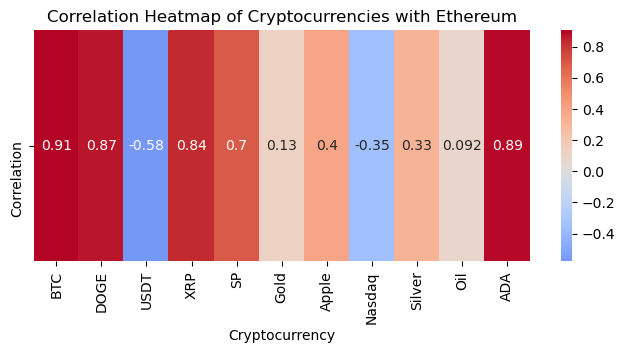

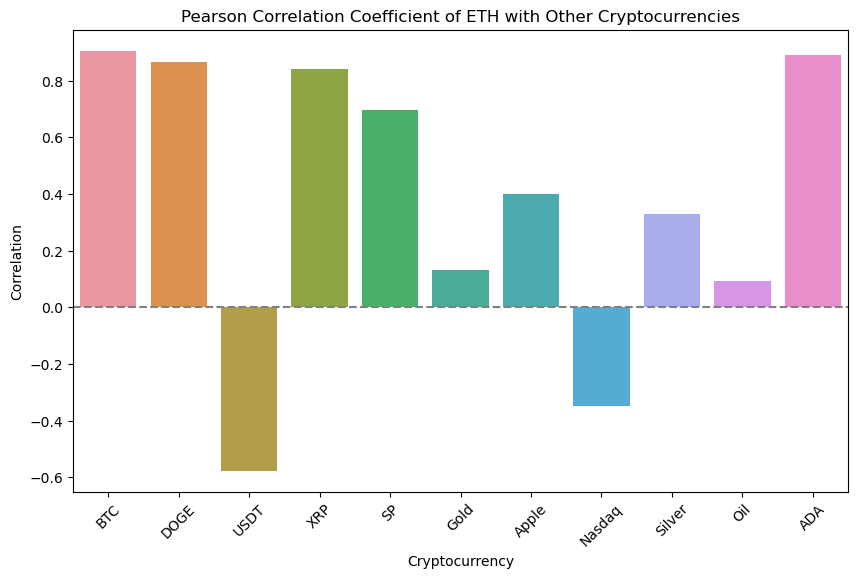

        Correlation  P-value
BTC          0.9053   0.0000
DOGE         0.8662   0.0000
USDT        -0.5768   0.0000
XRP          0.8399   0.0000
SP           0.6966   0.0000
Gold         0.1316   0.0004
Apple        0.3993   0.0000
Nasdaq      -0.3501   0.0000
Silver       0.3276   0.0000
Oil          0.0921   0.0127
ADA          0.8907   0.0000


In [95]:
"""
Visulisation of pearson correlation
"""
import seaborn as sns
import matplotlib.pyplot as plt


corr_df = pd.DataFrame(list(correlations.items()), columns=['Cryptocurrency', 'Correlation'])
corr_df.set_index('Cryptocurrency', inplace=True)

# Creating heatmap-like visualization
plt.figure(figsize=(8, 3))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Cryptocurrencies with Ethereum')
plt.show()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_df.index, y=corr_df['Correlation'])
plt.title('Pearson Correlation Coefficient of ETH with Other Cryptocurrencies')
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.show()


#Correlation Matrix with P-values

import pandas as pd
combined_results = pd.DataFrame({'Correlation': correlations, 'P-value': p_values})
combined_results_rounded = combined_results.round(4)
print(combined_results_rounded)



R-squared for ETH vs Close_BTC: 0.8195
R-squared for ETH vs Close_DOGE: 0.7503
R-squared for ETH vs Close_USDT: 0.3327
R-squared for ETH vs Close_XRP: 0.7054
R-squared for ETH vs Close_SP: 0.4853
R-squared for ETH vs Close_Gold: 0.0173
R-squared for ETH vs Close_Apple: 0.1595
R-squared for ETH vs Close_Nasdaq: 0.1226
R-squared for ETH vs Close_Silver: 0.1073
R-squared for ETH vs Close_Oil: 0.0085
R-squared for ETH vs Close_ADA: 0.7934


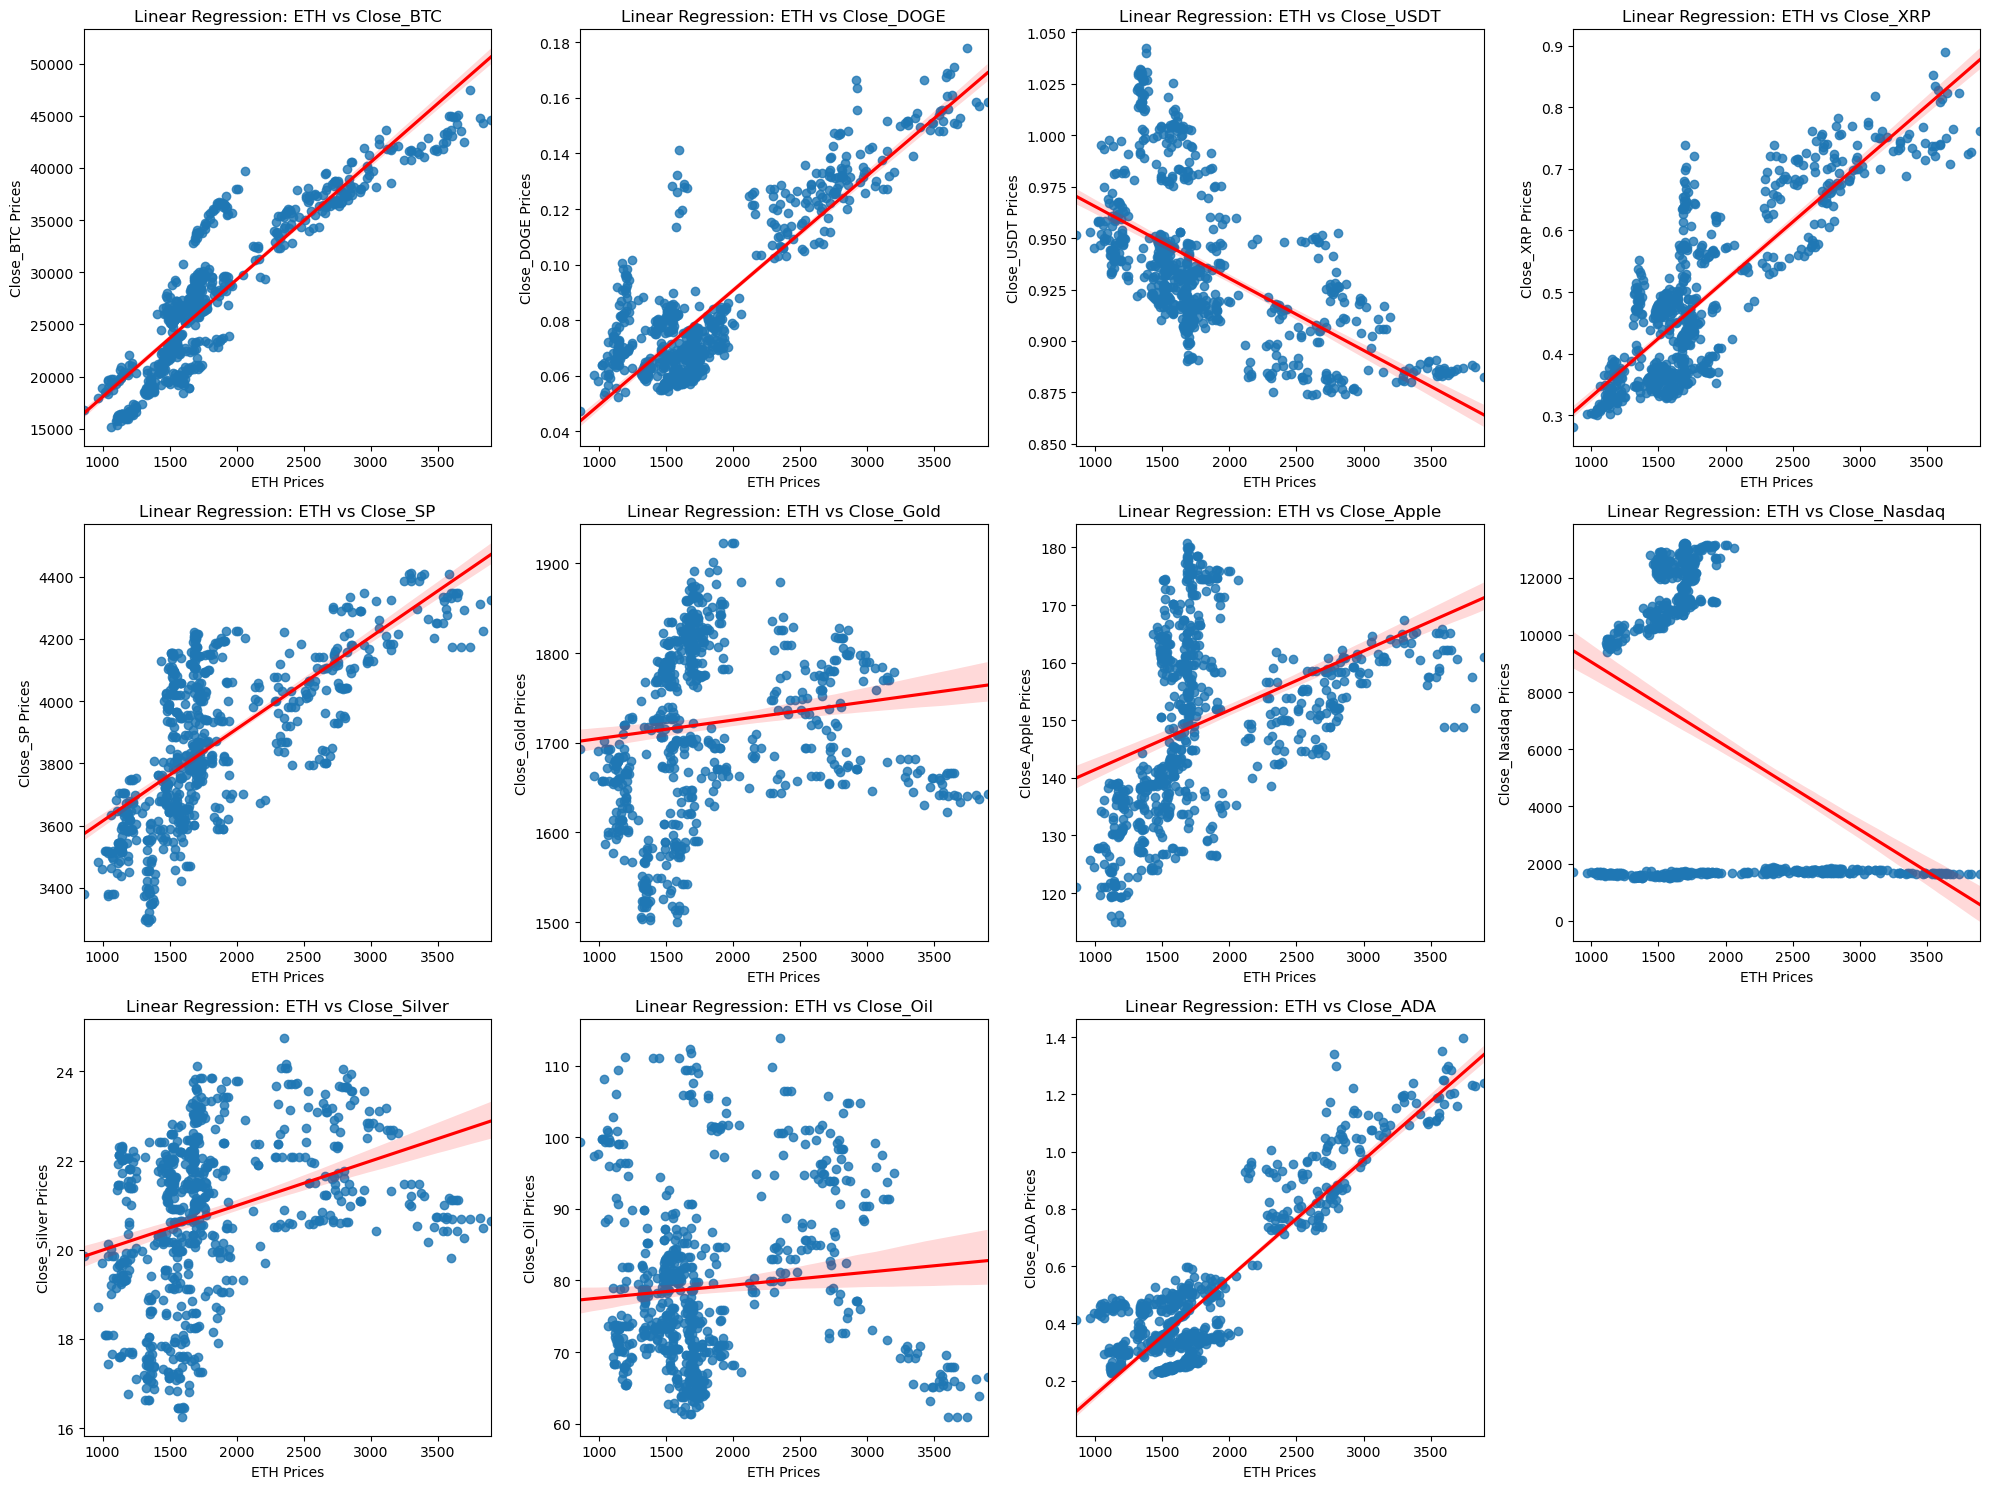

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm


n_rows = 3
n_cols = 4
plt.figure(figsize=(20, 15)) 
plot_number = 1

for column in df_clean.columns:
    if column != 'Close_ETH':
        plt.subplot(n_rows, n_cols, plot_number)
        sns.regplot(x='Close_ETH', y=column, data=df_clean, order=1, line_kws={"color": "red"})
        plt.title(f'Linear Regression: ETH vs {column}')
        plt.xlabel('ETH Prices')
        plt.ylabel(f'{column} Prices')
        X = sm.add_constant(df_clean['Close_ETH'])
        model = sm.OLS(df_clean[column], X).fit()
        print(f"R-squared for ETH vs {column}: {model.rsquared:.4f}")
        plot_number += 1

plt.tight_layout()
plt.show()


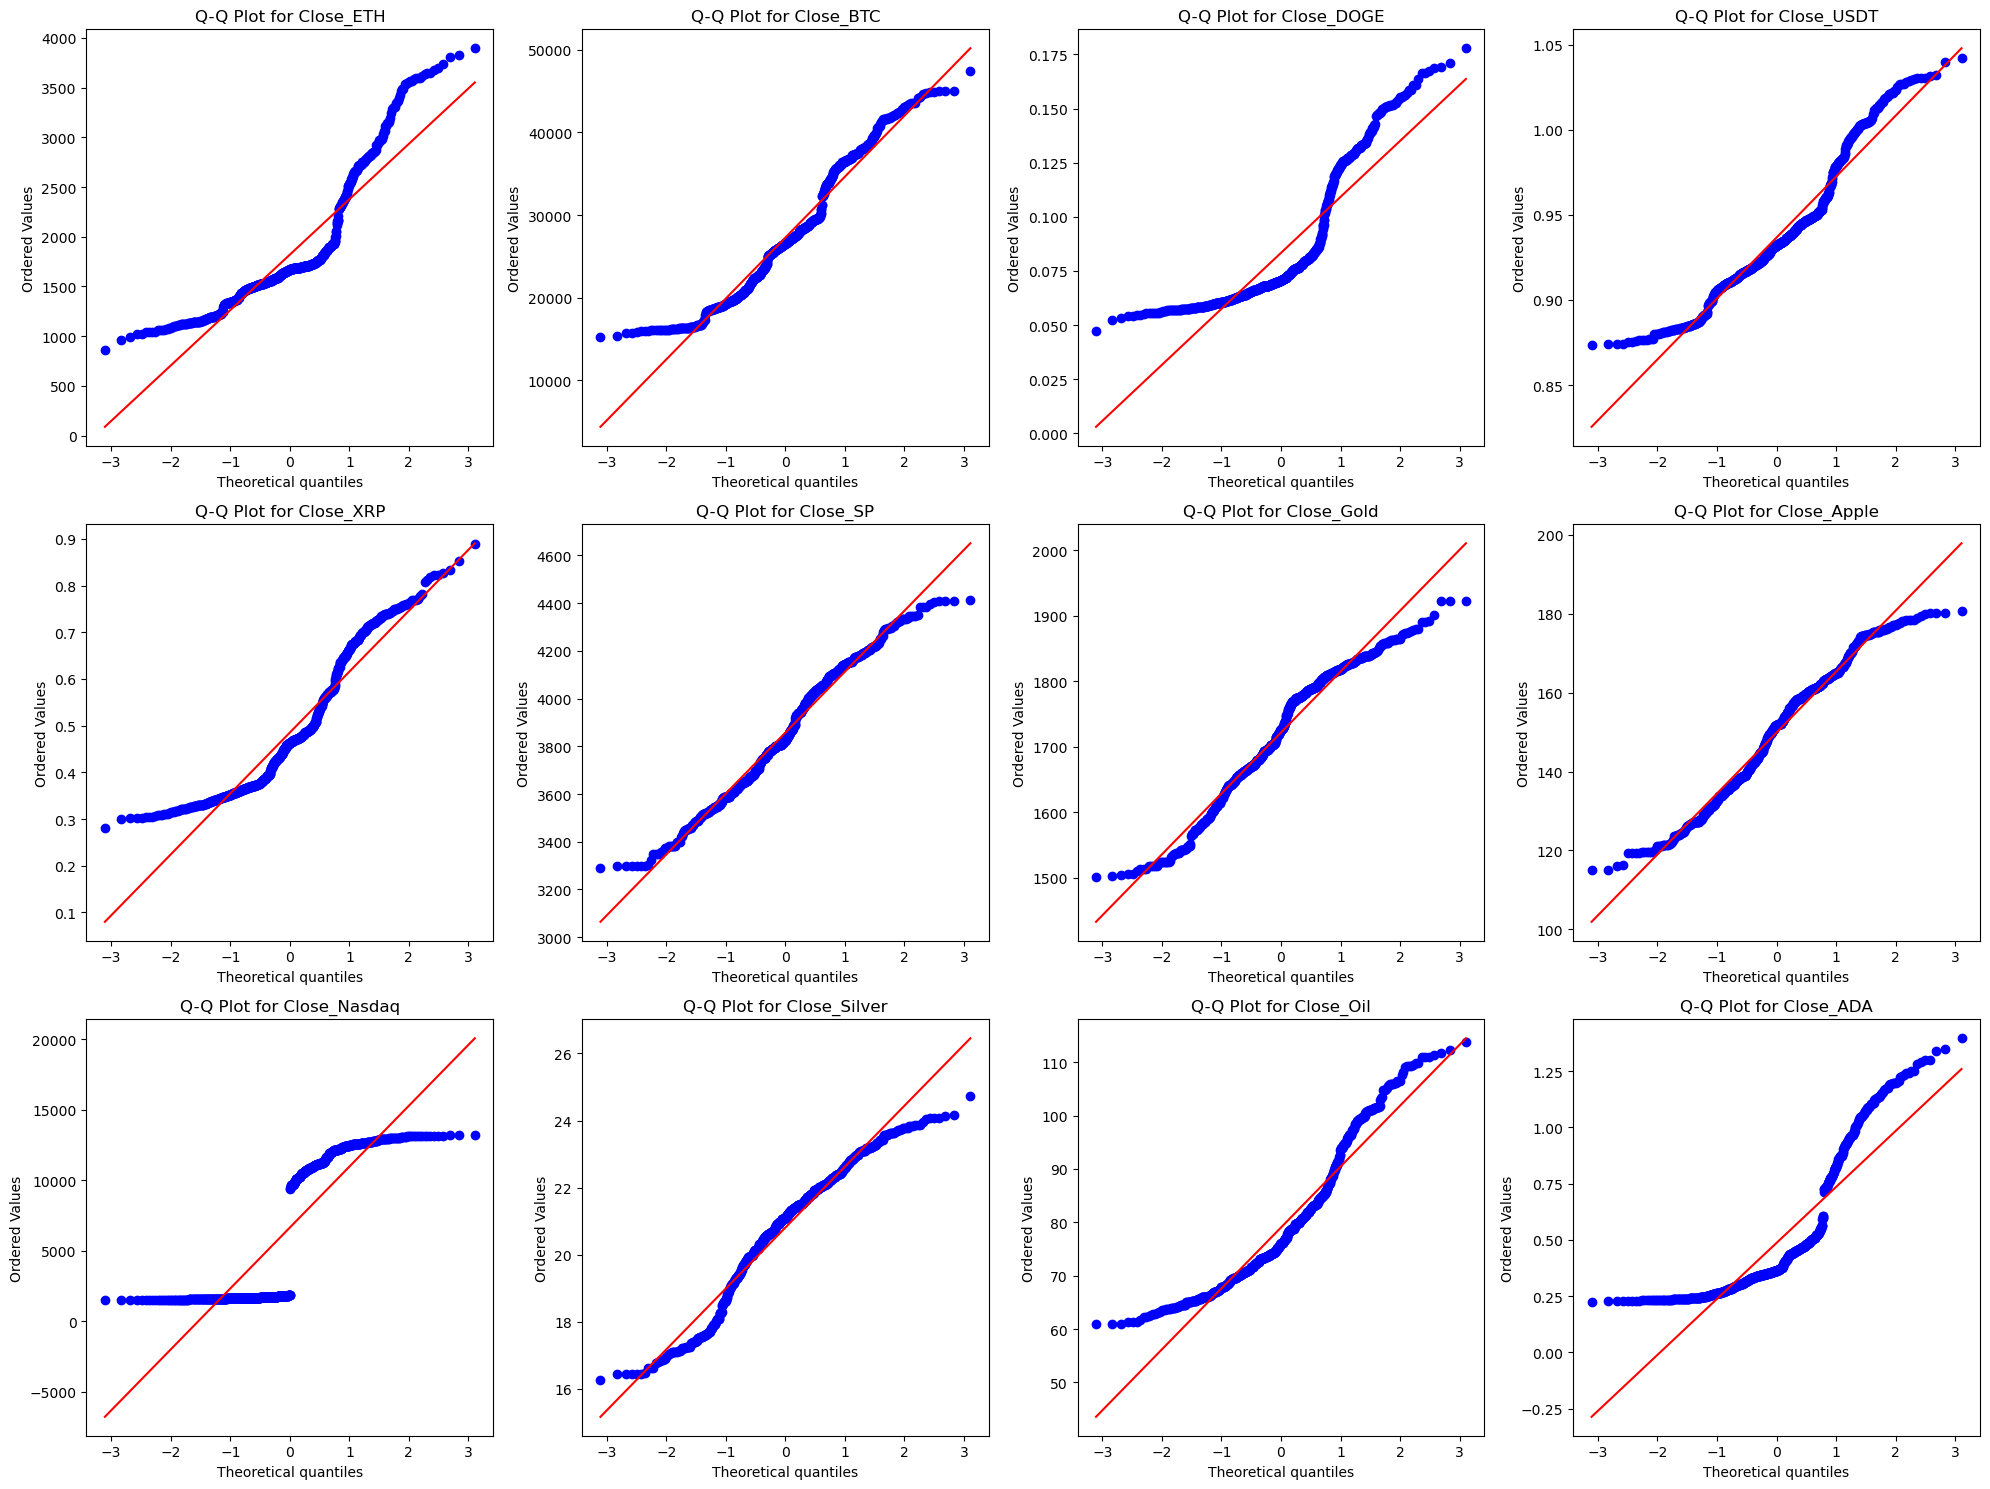

In [97]:
#2) Normality check: 
import scipy.stats as stats
import matplotlib.pyplot as plt

n_rows = 3
n_cols = 4
plt.figure(figsize=(20, 15))  
plot_number = 1

# Q-Q plots for each cryptocurrency, including Ethereum
for column in df_clean.columns:
    plt.subplot(n_rows, n_cols, plot_number)

    # Generate Q-Q plot for the column
    stats.probplot(df_clean[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plot_number += 1

    if plot_number > len(df_clean.columns):
        break


plt.tight_layout()
plt.show()



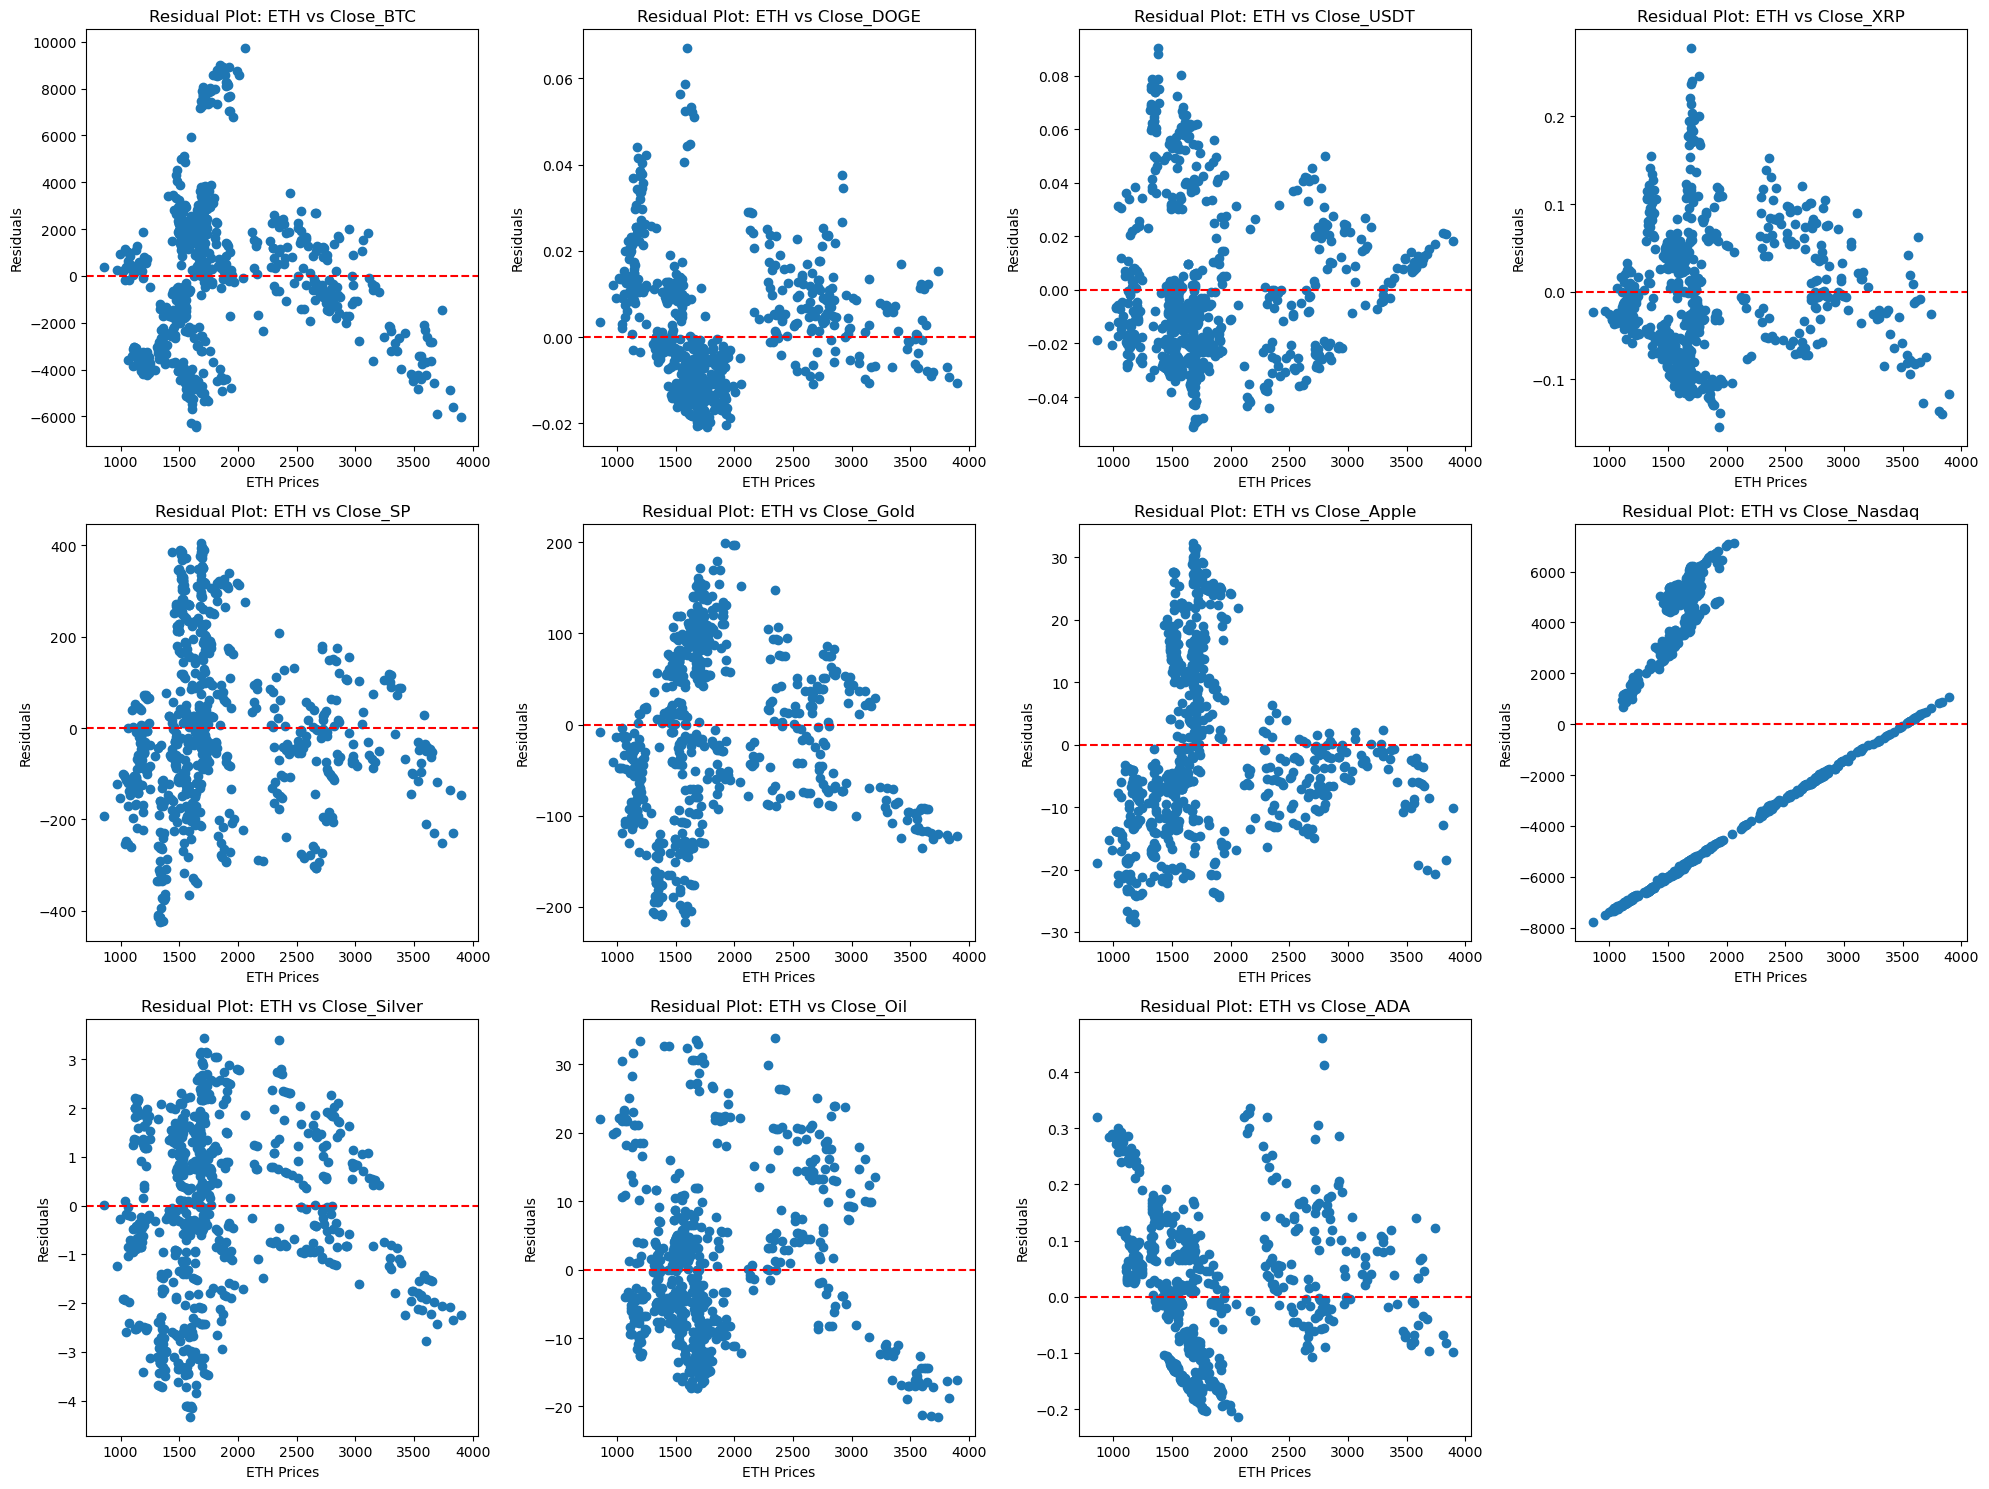

In [98]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

n_rows = 3
n_cols = 4
plt.figure(figsize=(20, 15))
plot_number = 1

lr = LinearRegression()

for column in df_clean.columns:
    if column != 'Close_ETH':
        X = df_clean['Close_ETH'].values.reshape(-1, 1)
        y = df_clean[column].values
        lr.fit(X, y)
        predictions = lr.predict(X)
        residuals = y - predictions

        plt.subplot(n_rows, n_cols, plot_number)

        plt.scatter(df_clean['Close_ETH'], residuals)
        plt.title(f'Residual Plot: ETH vs {column}')
        plt.xlabel('ETH Prices')
        plt.ylabel('Residuals')
        plt.axhline(y=0, color='r', linestyle='--')

        plot_number += 1

        if plot_number > n_rows * n_cols:
            break

plt.tight_layout()
plt.show()


In [99]:
#4) Independence check: 
#for a time series indpendence is complexed to assess need to consider autocorrelation
#therefore here we just assume this assumption has been met 

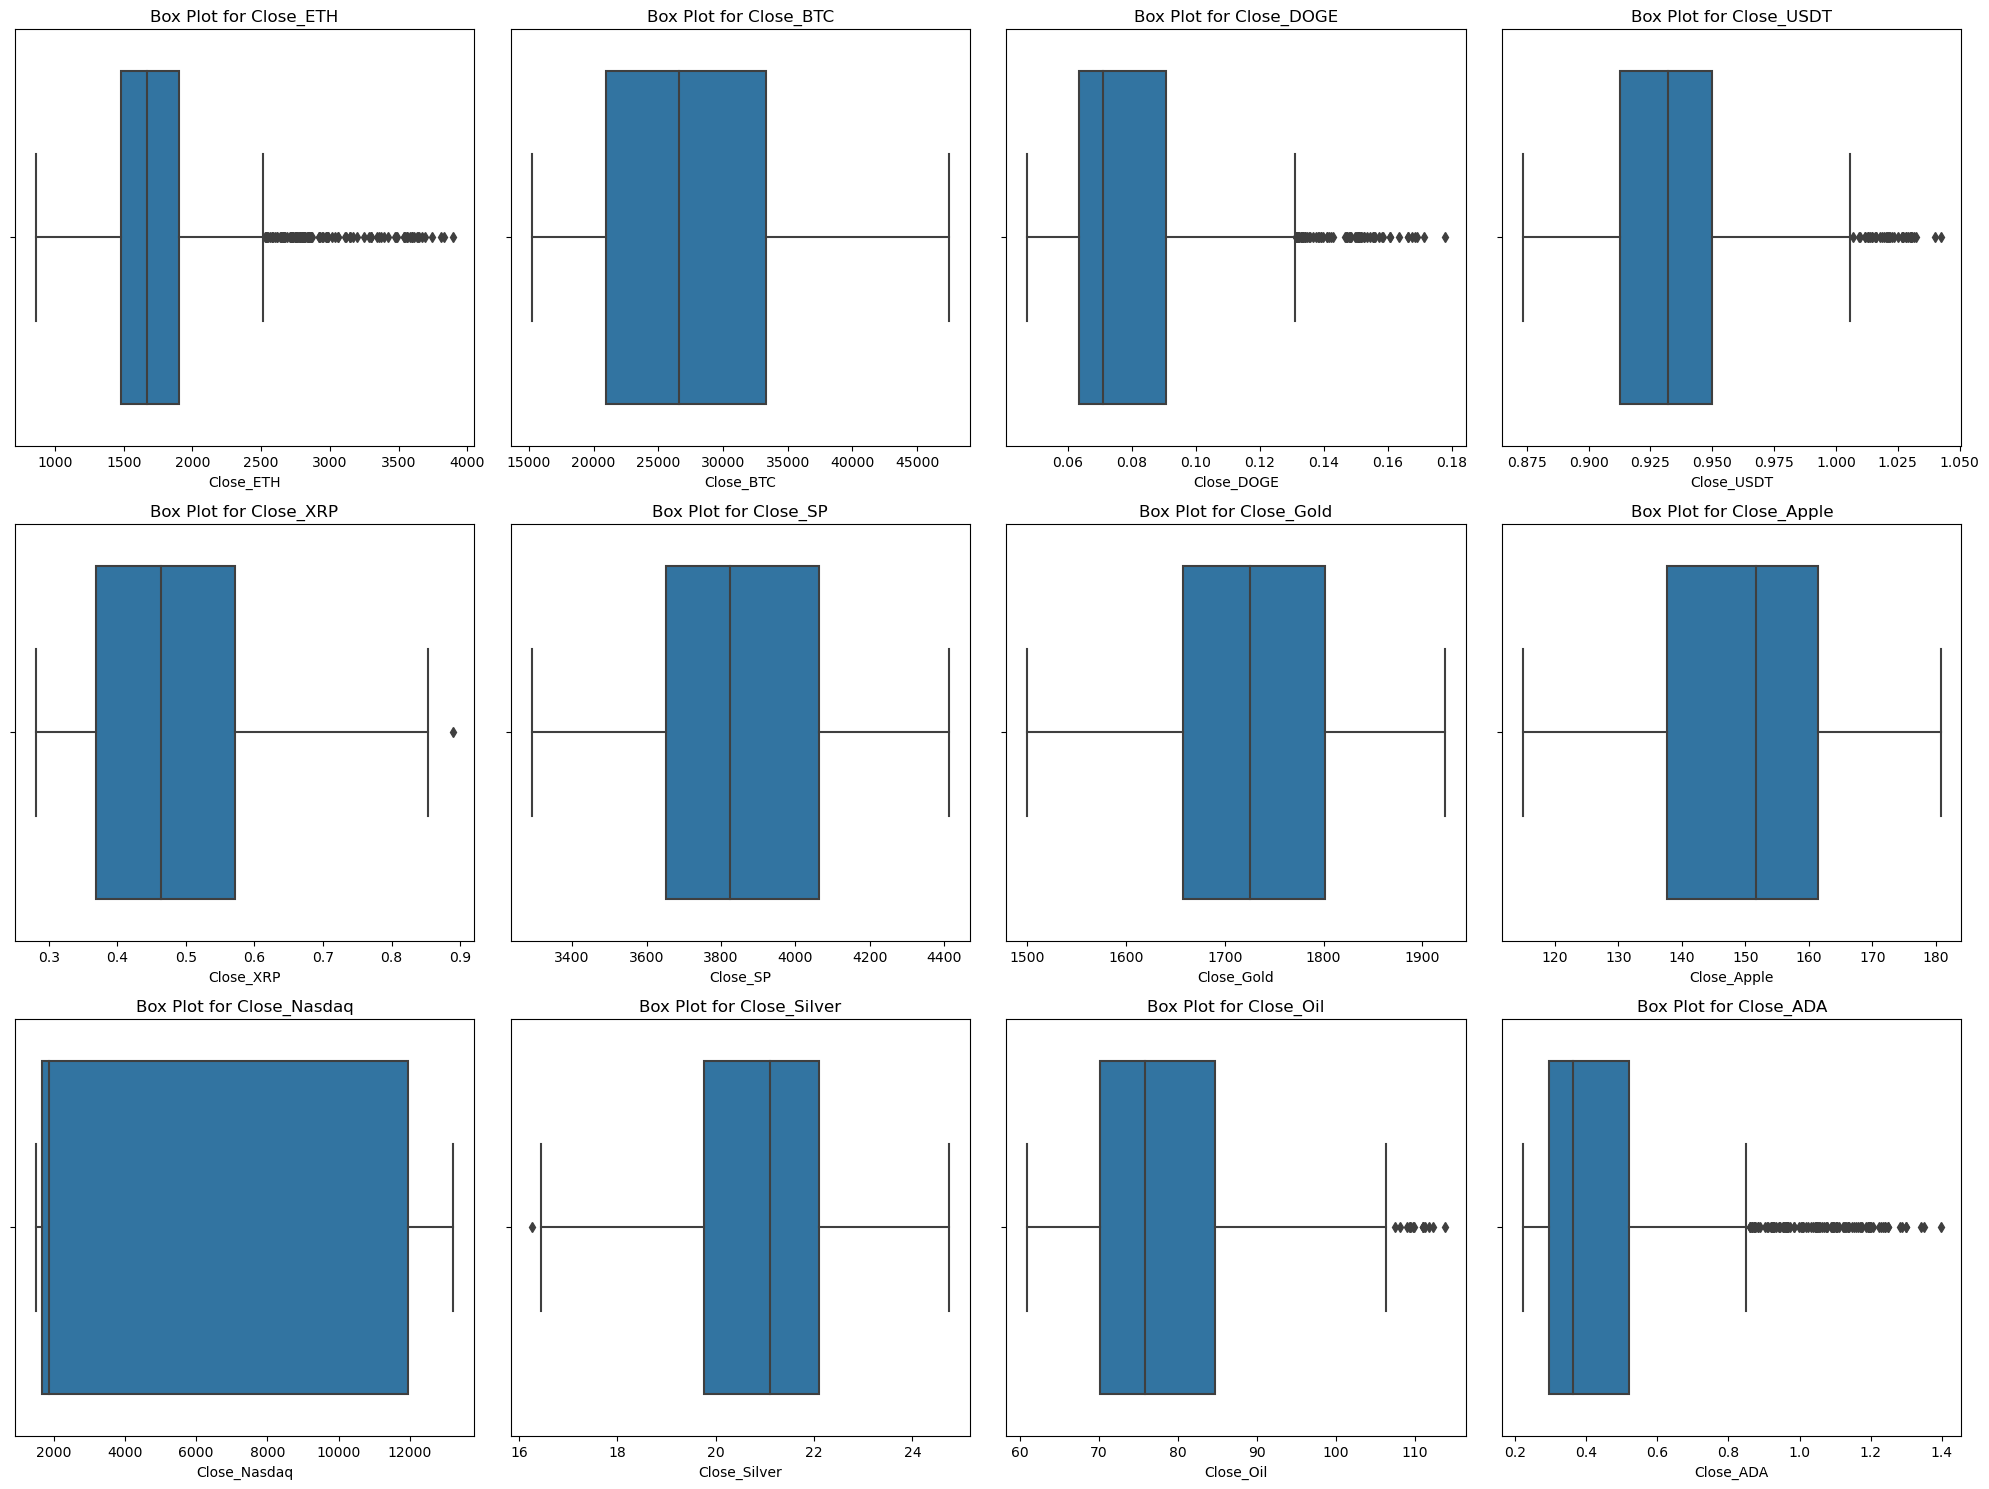

In [100]:
#5) Outliers check:
# Box plots for each cryptocurrency
import matplotlib.pyplot as plt
import seaborn as sns

n_rows = 3
n_cols = 4
plt.figure(figsize=(20, 15))
plot_number = 1

# Box plots for each cryptocurrency
for column in df_clean.columns:
    # Create a subplot at the current position
    plt.subplot(n_rows, n_cols, plot_number)

    # Create a boxplot
    sns.boxplot(df_clean[column])
    plt.title(f'Box Plot for {column}')
    plot_number += 1

    if plot_number > len(df_clean.columns):
        break

plt.tight_layout()
plt.show()



In [101]:
## Spearman's Rank Correlation Coefficient
"""
Non-linearity
Hypothesis 1 (Correlation Among Cryptocurrencies):

Null Hypothesis (H0): There is no significant correlation 
between the market values of Ethereum and other cryptocurrencies.

Alternative Hypothesis (H1): Market values of Ethereum exhibit a significant correlation 
with other cryptocurrencies.
"""

from scipy.stats import spearmanr

correlations = {}
p_values = {}

for column in df_clean.columns:
    if column != 'Close_ETH':  
        corr, p_value = spearmanr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Spearman Correlation Coefficient = 0.9191, p-value = 0.0000
ETH has a significant correlation with DOGE: Spearman Correlation Coefficient = 0.5854, p-value = 0.0000
ETH has a significant correlation with USDT: Spearman Correlation Coefficient = -0.6519, p-value = 0.0000
ETH has a significant correlation with XRP: Spearman Correlation Coefficient = 0.7486, p-value = 0.0000
ETH has a significant correlation with SP: Spearman Correlation Coefficient = 0.7251, p-value = 0.0000
ETH has a significant correlation with Gold: Spearman Correlation Coefficient = 0.3245, p-value = 0.0000
ETH has a significant correlation with Apple: Spearman Correlation Coefficient = 0.5443, p-value = 0.0000
ETH has a significant correlation with Nasdaq: Spearman Correlation Coefficient = 0.0987, p-value = 0.0076
ETH has a significant correlation with Silver: Spearman Correlation Coefficient = 0.3952, p-value = 0.0000
ETH does not have a significant correlation with Oil:

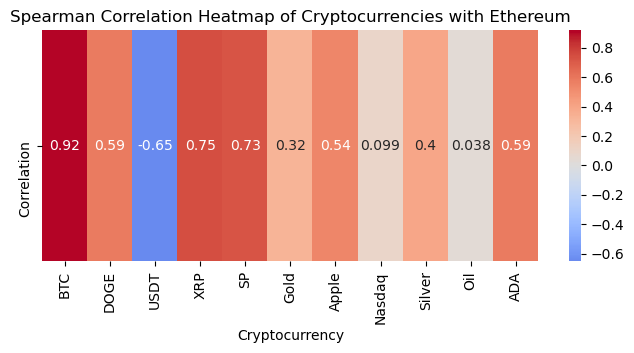

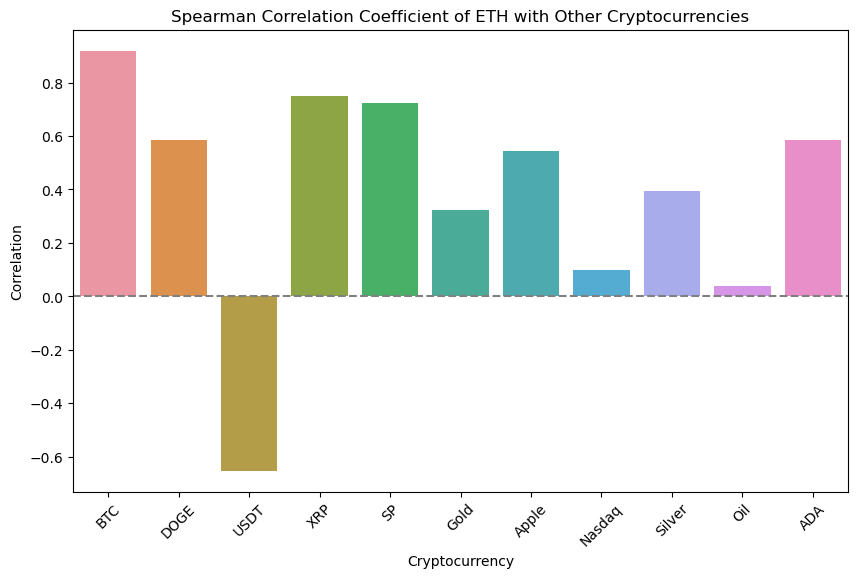

,Correlation,P-value
Cryptocurrency,,
BTC,0.9191,0.0000
DOGE,0.5854,0.0000
USDT,-0.6519,0.0000
XRP,0.7486,0.0000
SP,0.7251,0.0000
Gold,0.3245,0.0000
Apple,0.5443,0.0000
Nasdaq,0.0987,0.0076
Silver,0.3952,0.0000


In [102]:
import pandas as pd
spearman_corr_df = pd.DataFrame(list(correlations.items()), columns=['Cryptocurrency', 'Correlation'])
spearman_p_values_df = pd.DataFrame(list(p_values.items()), columns=['Cryptocurrency', 'P-value'])

spearman_combined_df = pd.merge(spearman_corr_df, spearman_p_values_df, on='Cryptocurrency')
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap-like visualization for the correlation values
spearman_combined_df.set_index('Cryptocurrency', inplace=True)
plt.figure(figsize=(8, 3))
sns.heatmap(spearman_combined_df[['Correlation']].T, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap of Cryptocurrencies with Ethereum')
plt.show()

# Bar chart for the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=spearman_combined_df.index, y=spearman_combined_df['Correlation'])
plt.title('Spearman Correlation Coefficient of ETH with Other Cryptocurrencies')
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()

# DataFrame of p-value and correlation
spearman_combined_df.style.format({'Correlation': '{:.4f}', 'P-value': '{:.4f}'})



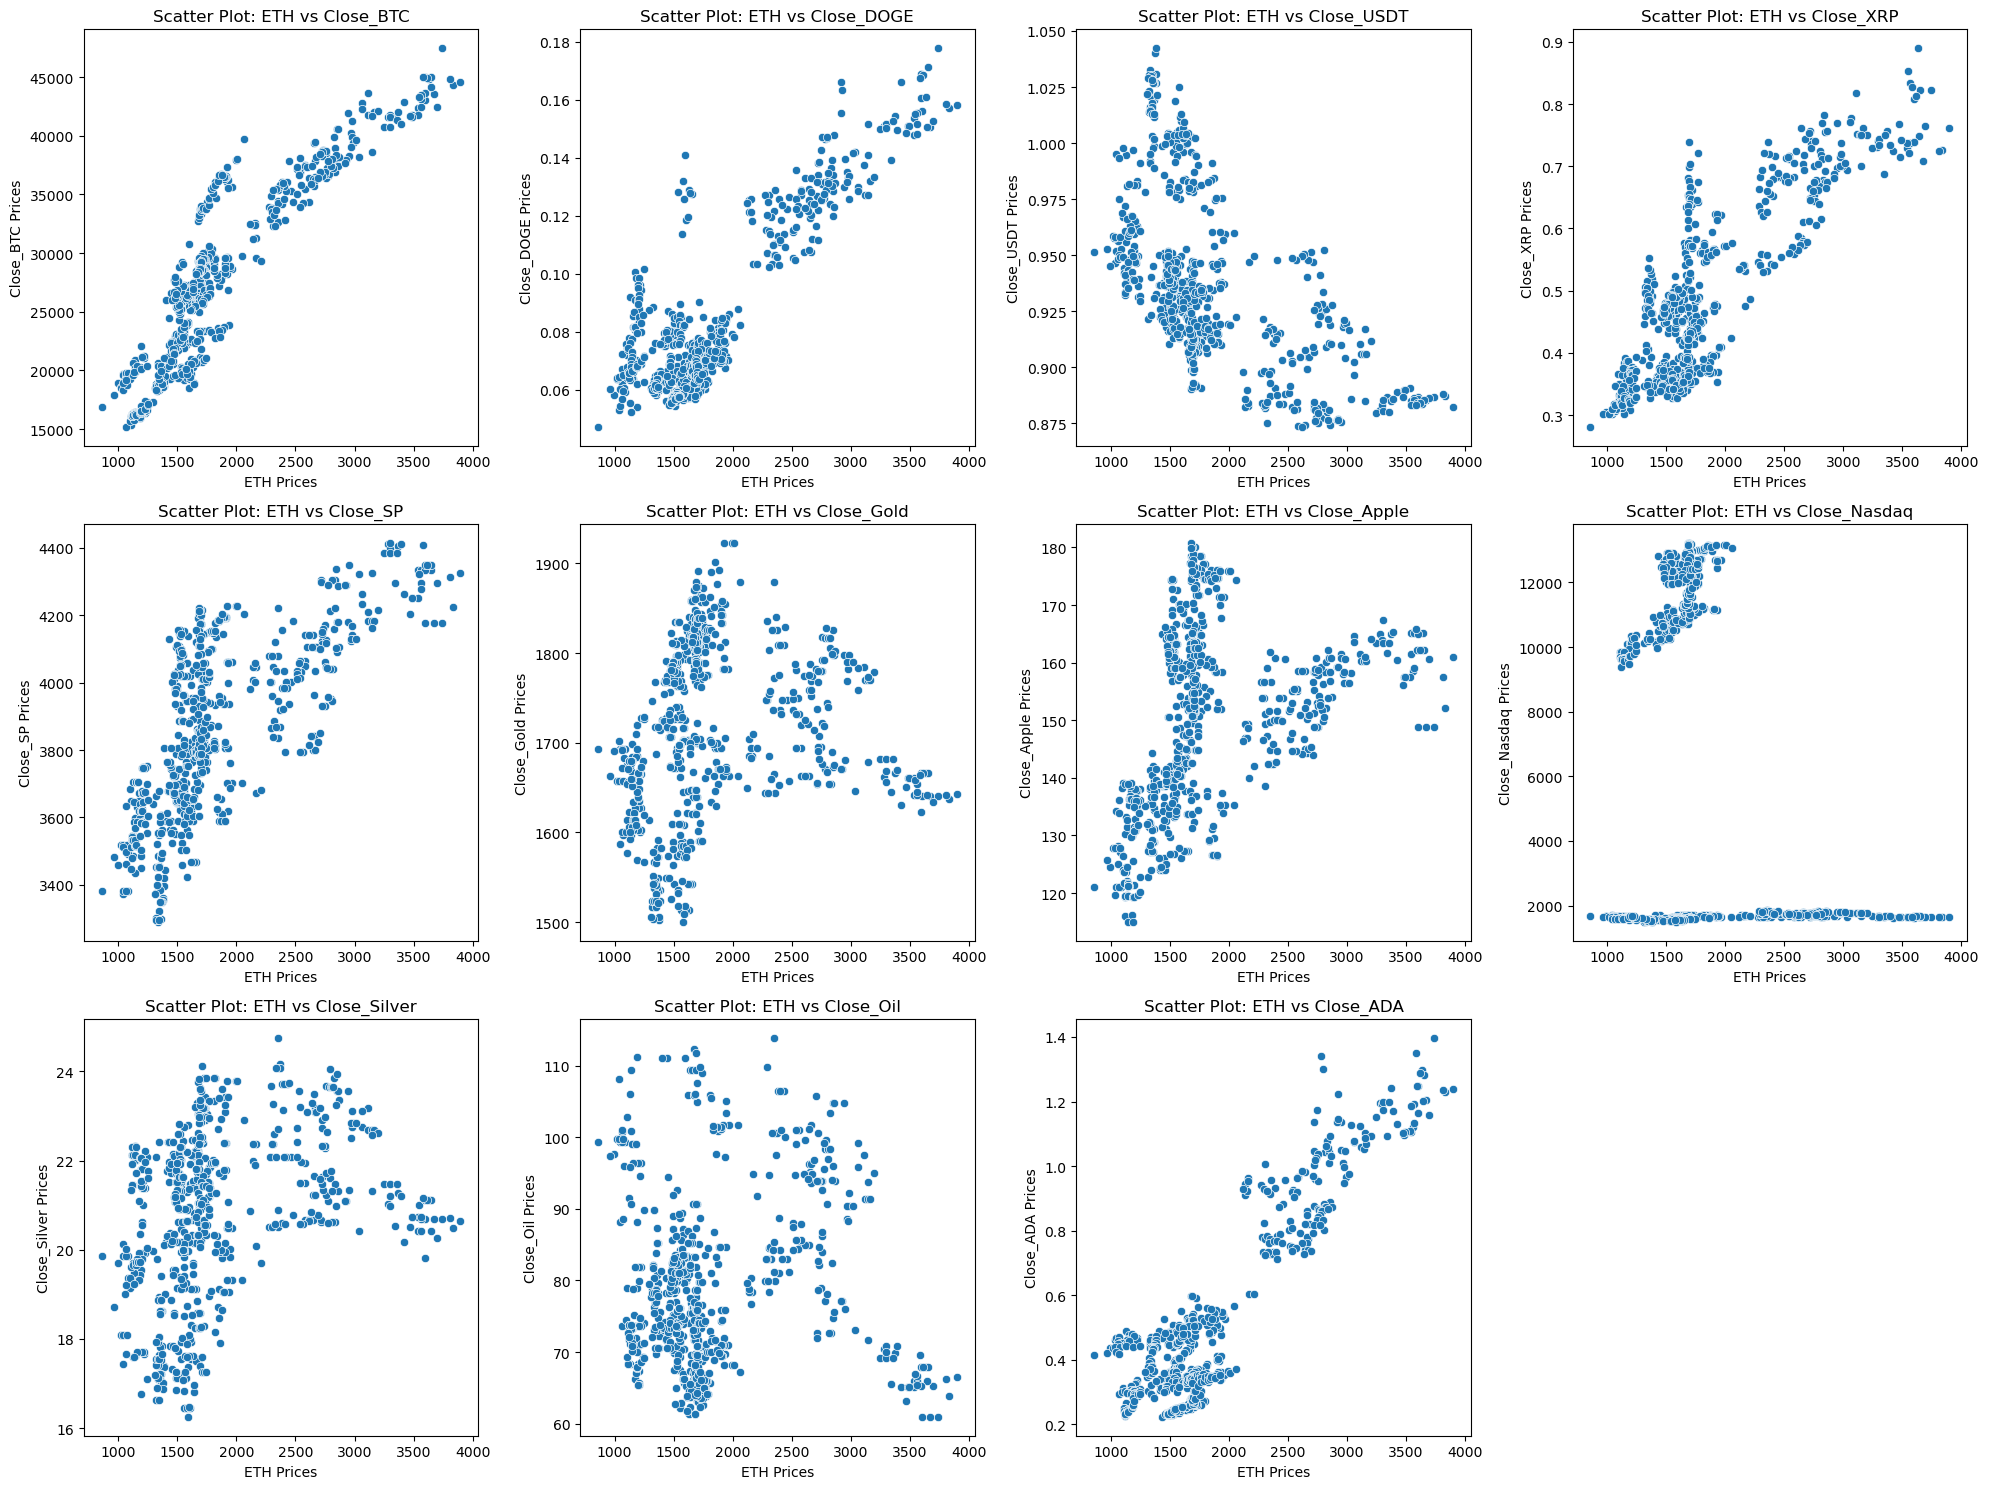

In [103]:

"""
To ensure that the underlying assumptions for using Spearman's rank correlation coefficient correlation hold 
for our dataset, we need to verify a few key aspects:

1) Monotonic Relationship: The Spearman correlation measures the strength and direction of a monotonic 
relationship between two variables. A monotonic relationship either consistently increases or decreases 
as one variable increases.

2)Ordinal Data: Spearman correlation is most suitable for ordinal data, where data can be ranked but not 
necessarily measured, but it can also be applied to interval and ratio data.

3)No Repeated Data Values: The Spearman correlation is most effective when there are few tied ranks in the data. 
Tied ranks occur when the same value appears multiple times. While it can handle ties, many can affect the 
correlation strength.

But we need to note that while these assumptions are ideal, slight violations may not drastically 
impact our results

"""
# Montonic Relationship

        
import seaborn as sns
import matplotlib.pyplot as plt

n_rows = 3
n_cols = 4
plt.figure(figsize=(20, 15))
plot_number = 1

for column in df_clean.columns:
    if column != 'Close_ETH':
        plt.subplot(n_rows, n_cols, plot_number)

        sns.scatterplot(x=df_clean['Close_ETH'], y=df_clean[column])
        plt.title(f'Scatter Plot: ETH vs {column}')
        plt.xlabel('ETH Prices')
        plt.ylabel(f'{column} Prices')

        plot_number += 1

        if plot_number > n_rows * n_cols:
            break

plt.tight_layout()
plt.show()



In [104]:
#3)Uniqueness 

# Check for repeated values in Ethereum prices
unique_eth = df_clean['Close_ETH'].nunique()
total_eth = df_clean['Close_ETH'].count()
print(f"Unique ETH Prices: {unique_eth}, Total ETH Prices: {total_eth}")

# Check for other cryptocurrencies
for column in df_clean.columns:
    if column != 'Close_ETH':
        unique_crypto = df_clean[column].nunique()
        total_crypto = df_clean[column].count()
        print(f"Unique prices for {column.replace('Close_', '')}: {unique_crypto}, Total prices: {total_crypto}")


Unique ETH Prices: 729, Total ETH Prices: 732
Unique prices for BTC: 719, Total prices: 732
Unique prices for DOGE: 724, Total prices: 732
Unique prices for USDT: 529, Total prices: 732
Unique prices for XRP: 652, Total prices: 732
Unique prices for SP: 502, Total prices: 732
Unique prices for Gold: 466, Total prices: 732
Unique prices for Apple: 478, Total prices: 732
Unique prices for Nasdaq: 493, Total prices: 732
Unique prices for Silver: 487, Total prices: 732
Unique prices for Oil: 467, Total prices: 732
Unique prices for ADA: 653, Total prices: 732


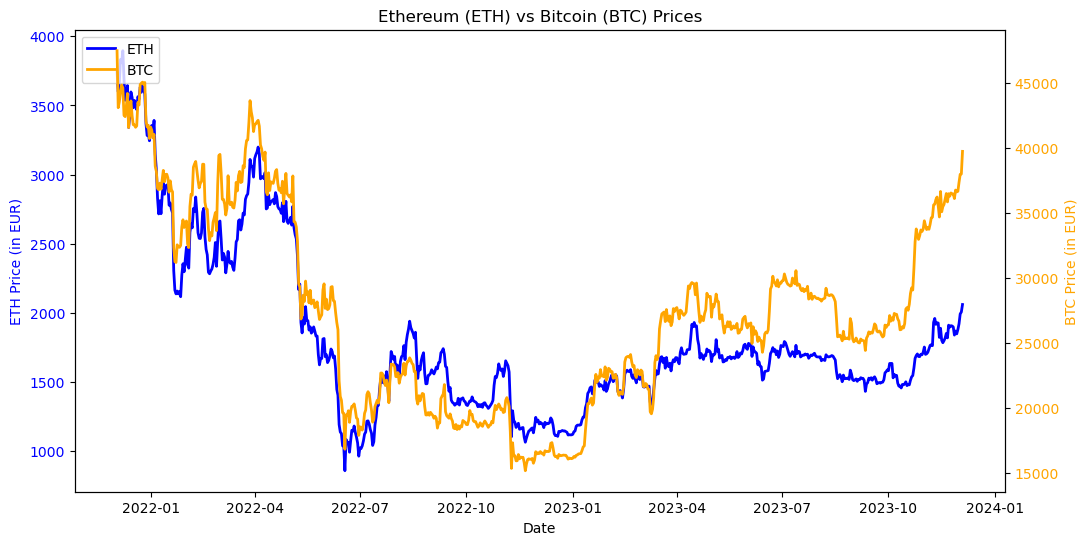

In [105]:
date_index = df_clean.index
eth_values = df_clean['Close_ETH']
btc_values = df_clean['Close_BTC']

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Ethereum (ETH) vs Bitcoin (BTC) Prices')
plt.xlabel('Date')
ax1.grid(False) 

ax1.set_ylabel('ETH Price (in EUR)', color='blue')
ax1.plot(date_index, eth_values, label='ETH', color='blue', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('BTC Price (in EUR)', color='orange')
ax2.plot(date_index, btc_values, label='BTC', color='orange', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.show()


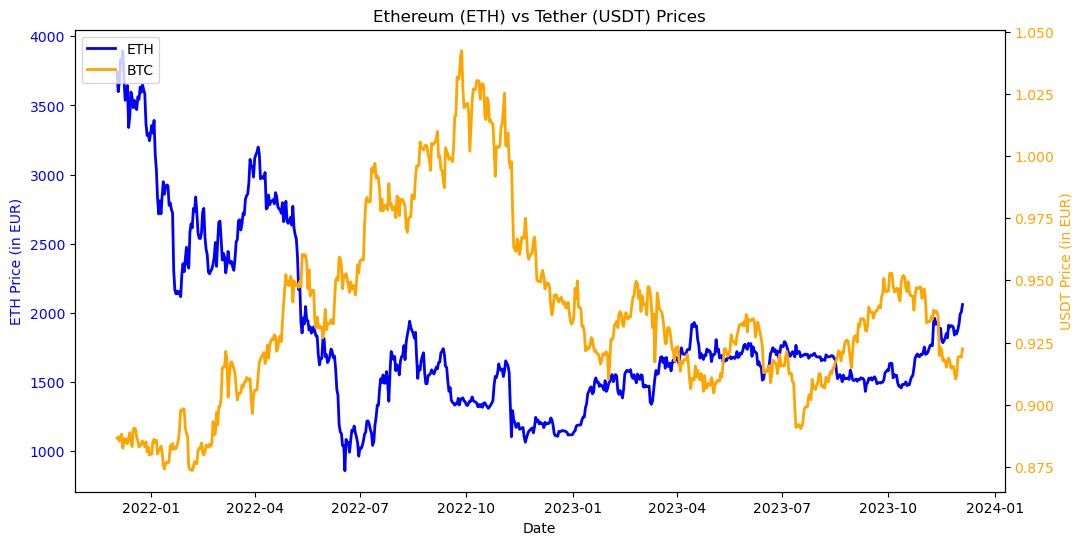

In [106]:
date_index = df_clean.index
eth_values = df_clean['Close_ETH']
usdt_values = df_clean['Close_USDT']

fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Ethereum (ETH) vs Tether (USDT) Prices')
plt.xlabel('Date')
ax1.grid(False)  

ax1.set_ylabel('ETH Price (in EUR)', color='blue')
ax1.plot(date_index, eth_values, label='ETH', color='blue', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('USDT Price (in EUR)', color='orange')
ax2.plot(date_index, usdt_values, label='BTC', color='orange', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.show()


In [107]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


# Now perform the ADF test on the cleaned extended data
columns = df_clean.columns
df_clean_stationary = pd.DataFrame(index=df_clean.index)

for column in columns:
    adf_result_original = adfuller(df_clean[column].dropna())
    print(f"ADF Test Results for Original {column}:")
    print('ADF Statistic: %f' % adf_result_original[0])
    print('p-value: %f' % adf_result_original[1])

    if adf_result_original[1] < 0.05:
        print(f"The original time series of {column} is stationary.\n")
        df_clean_stationary[column] = df_clean[column]
    else:
        print(f"The original time series of {column} is not stationary.\n")
        diff_series = df_clean[column].diff().dropna()

        # Differenced series ADF test
        adf_result_diff = adfuller(diff_series.dropna())
        print(f"ADF Test Results for Differenced {column}:")
        print('ADF Statistic: %f' % adf_result_diff[0])
        print('p-value: %f' % adf_result_diff[1])

        if adf_result_diff[1] < 0.05:
            print(f"The differenced time series of {column} is stationary.\n")
            df_clean_stationary[column] = diff_series.fillna(method='bfill')
            
        else:
            print(f"The differenced time series of {column} is still not stationary.\n")
    
    print("\n" + "-"*50 + "\n")

df_clean_stationary.dropna(inplace=True)


ADF Test Results for Original Close_ETH:
ADF Statistic: -3.413452
p-value: 0.010509
The original time series of Close_ETH is stationary.


--------------------------------------------------

ADF Test Results for Original Close_BTC:
ADF Statistic: -2.237581
p-value: 0.192890
The original time series of Close_BTC is not stationary.

ADF Test Results for Differenced Close_BTC:
ADF Statistic: -27.674421
p-value: 0.000000
The differenced time series of Close_BTC is stationary.


--------------------------------------------------

ADF Test Results for Original Close_DOGE:
ADF Statistic: -2.662265
p-value: 0.080799
The original time series of Close_DOGE is not stationary.

ADF Test Results for Differenced Close_DOGE:
ADF Statistic: -8.448427
p-value: 0.000000
The differenced time series of Close_DOGE is stationary.


--------------------------------------------------

ADF Test Results for Original Close_USDT:
ADF Statistic: -1.838379
p-value: 0.361581
The original time series of Close_USDT is

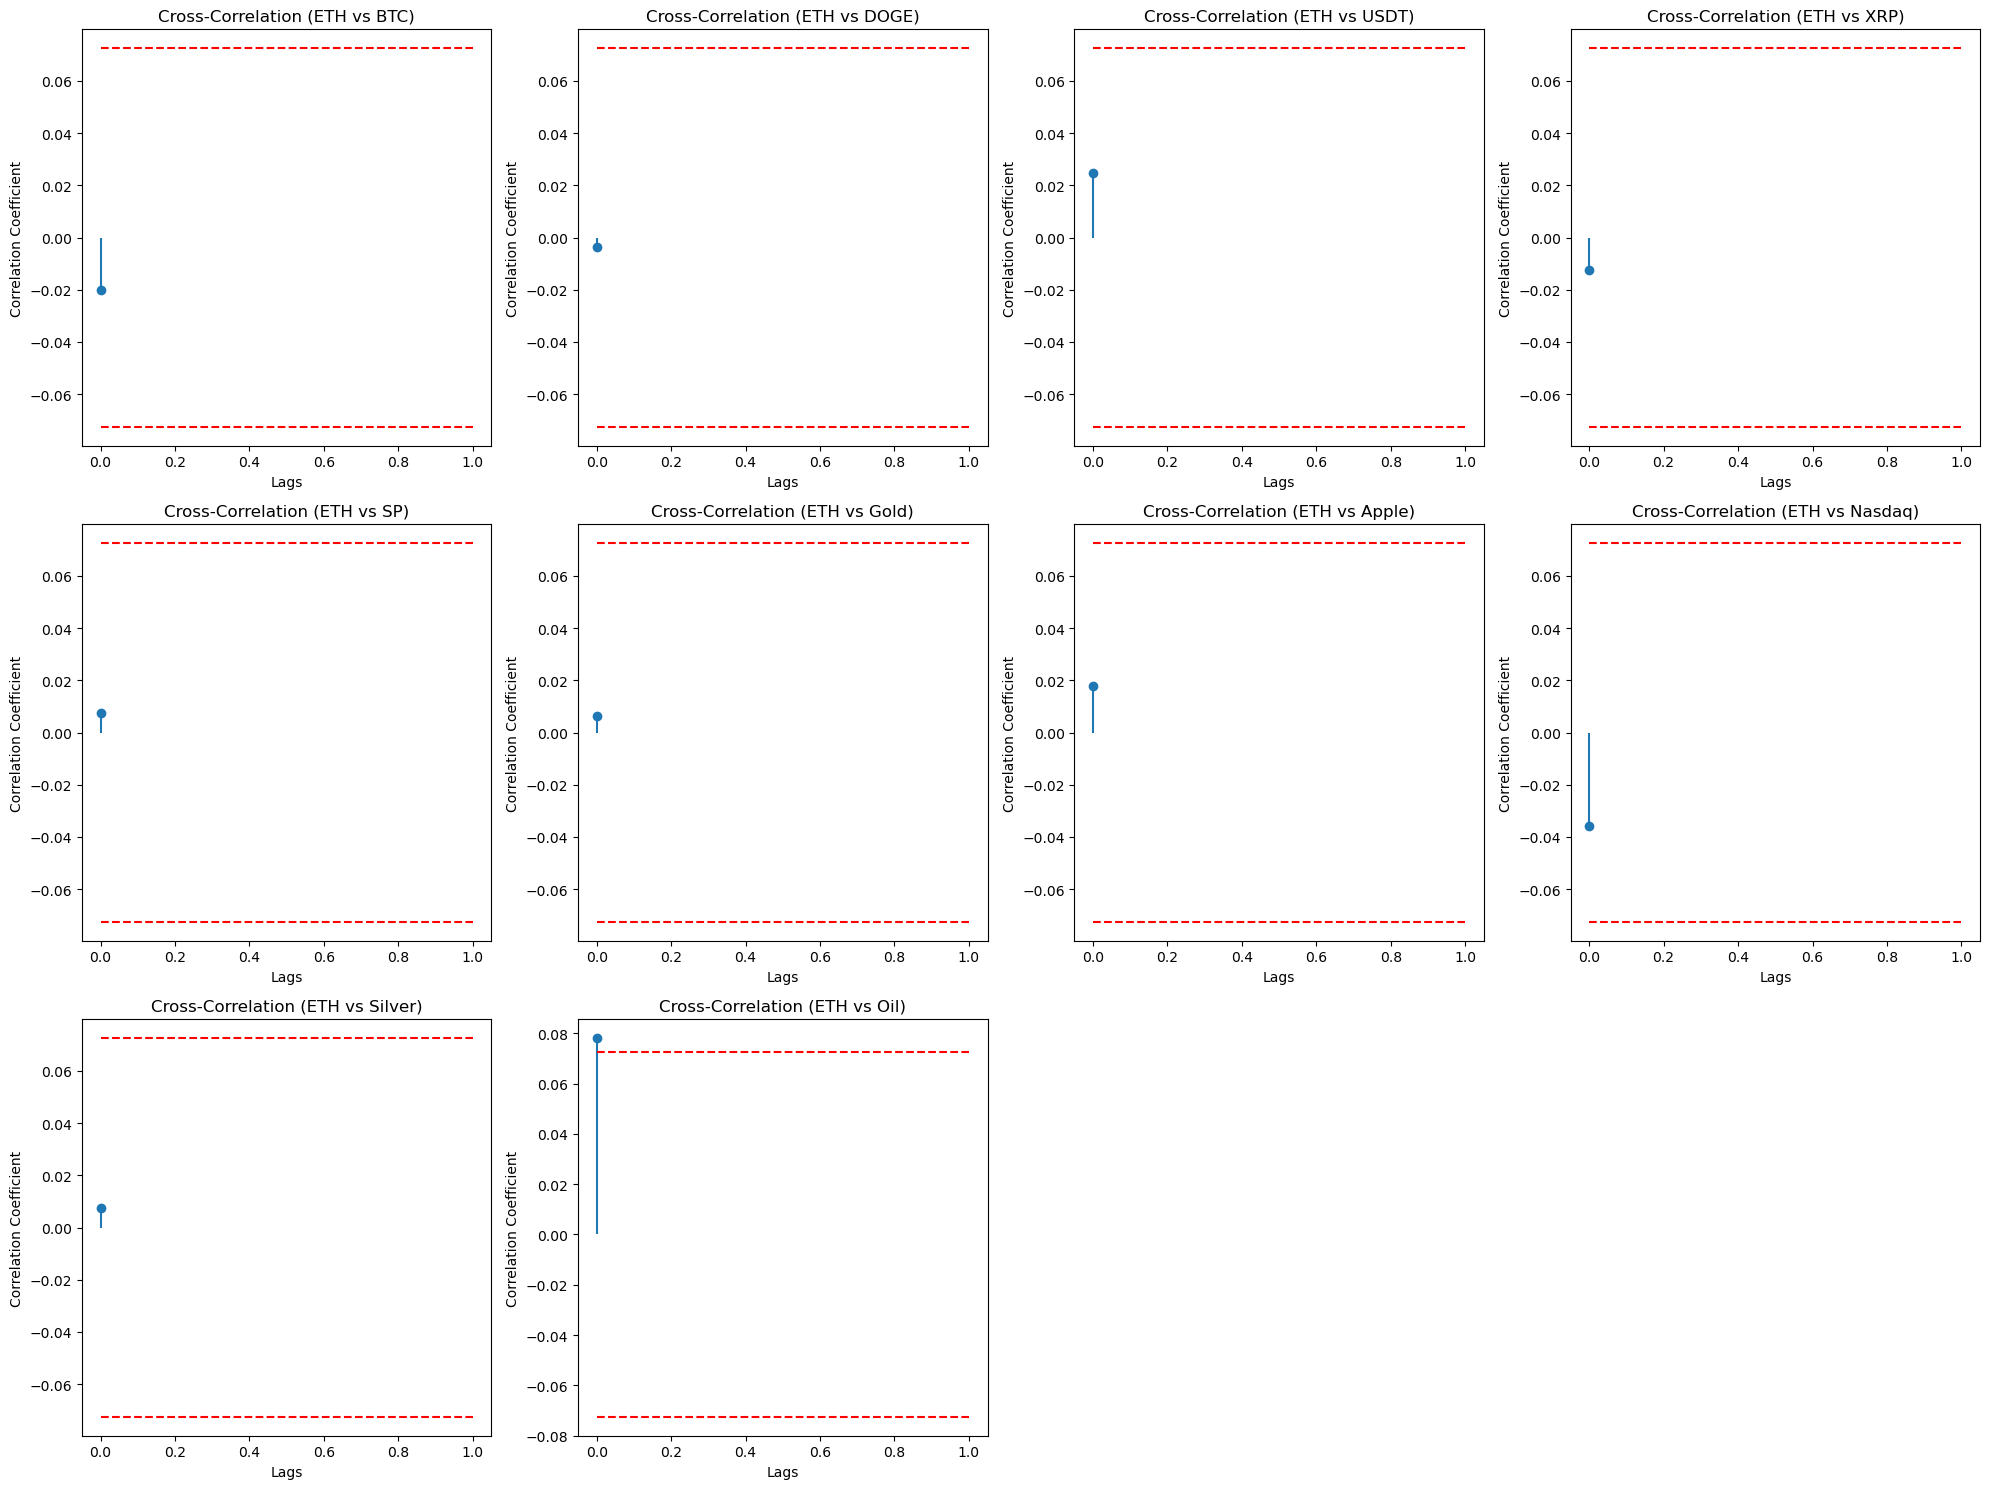

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf


n_rows = 3
n_cols = 4
plt.figure(figsize=(20, 15))

plot_number = 1


columns = ['Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP', 'Close_SP','Close_Gold','Close_Apple',
           'Close_Nasdaq','Close_Silver','Close_Oil']


num_lags = 1
n = len(df_clean_stationary['Close_ETH'])
conf_interval = 1.96 / np.sqrt(n)  # 95% confidence interval

for column in columns:
    cross_corr = ccf(df_clean_stationary['Close_ETH'], df_clean_stationary[column])[:num_lags]

    plt.subplot(n_rows, n_cols, plot_number)

    plt.stem(range(len(cross_corr)), cross_corr, use_line_collection=True, basefmt=" ")
    plt.hlines(conf_interval, xmin=0, xmax=num_lags, colors='r', linestyles='dashed', label='Upper Confidence Bound (95%)')
    plt.hlines(-conf_interval, xmin=0, xmax=num_lags, colors='r', linestyles='dashed', label='Lower Confidence Bound (95%)')
    plt.title(f'Cross-Correlation (ETH vs {column.replace("Close_", "")})')
    plt.xlabel('Lags')
    plt.ylabel('Correlation Coefficient')

    plot_number += 1

    if plot_number > n_rows * n_cols:
        break

plt.tight_layout()
plt.show()


In [ ]:
#Hypothesis 3 Random forest:ignore for now
"""
Random Forest Regressor
Suitable For: Capturing non-linear relationships between features and the target variable.

Assumptions: Less stringent about data stationarity; can handle complex, non-linear relationships.
Strengths: Good for capturing complex relationships; inherently handles feature interactions; provides 
feature importance.

Use Case: Use Random Forest if you have multiple predictors (like past ETH prices, technical indicators, 
other correlated assets) and you suspect complex, non-linear dynamics.

Use cross-validation to tune hyperparameters (number of trees, depth).

"""

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


eth_data = df_clean_stationary_extended['Close_ETH']

# Feature Engineering: Create lagged features (1-day lag, 7-day lag)
eth_data_lagged = pd.concat([eth_data.shift(1), eth_data.shift(7)], axis=1)
eth_data_lagged.columns = ['ETH_lag_1', 'ETH_lag_7']
eth_data_lagged['ETH_rolling_mean_7'] = eth_data.rolling(window=7).mean()
eth_data_lagged.dropna(inplace=True)


# Define X and y
X = eth_data_lagged
y = eth_data[eth_data_lagged.index].shift(-1)  

X = X.iloc[:-1]
y = y.iloc[:-1]

tscv = TimeSeriesSplit(n_splits=5)

model = RandomForestRegressor(n_estimators=100, random_state=1)

mse_scores = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    

average_mse = np.mean(mse_scores)
print('Average MSE Base Model:', average_mse)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual ETH Closing Prices', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted - RandomForest Base Model', linestyle='--', marker='o')
plt.title('Actual vs Predicted ETH Closing Prices - RandomForest')
plt.xlabel('Date')
plt.ylabel('Closing Price (ETH)')
plt.legend()
plt.show()